100%|██████████| 2000/2000 [00:02<00:00, 722.73it/s]


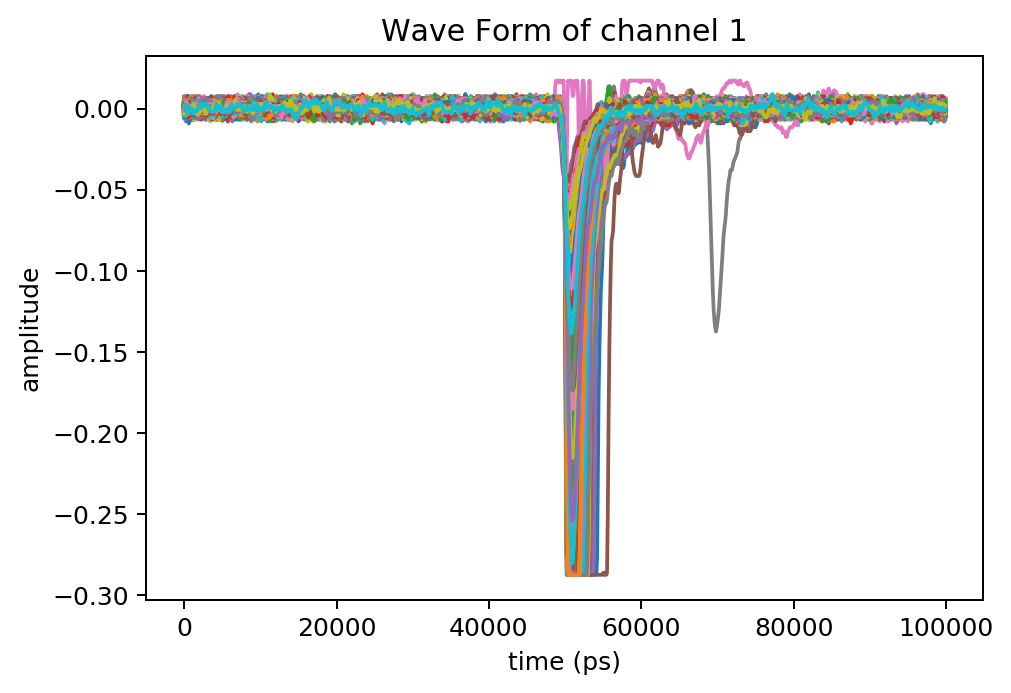

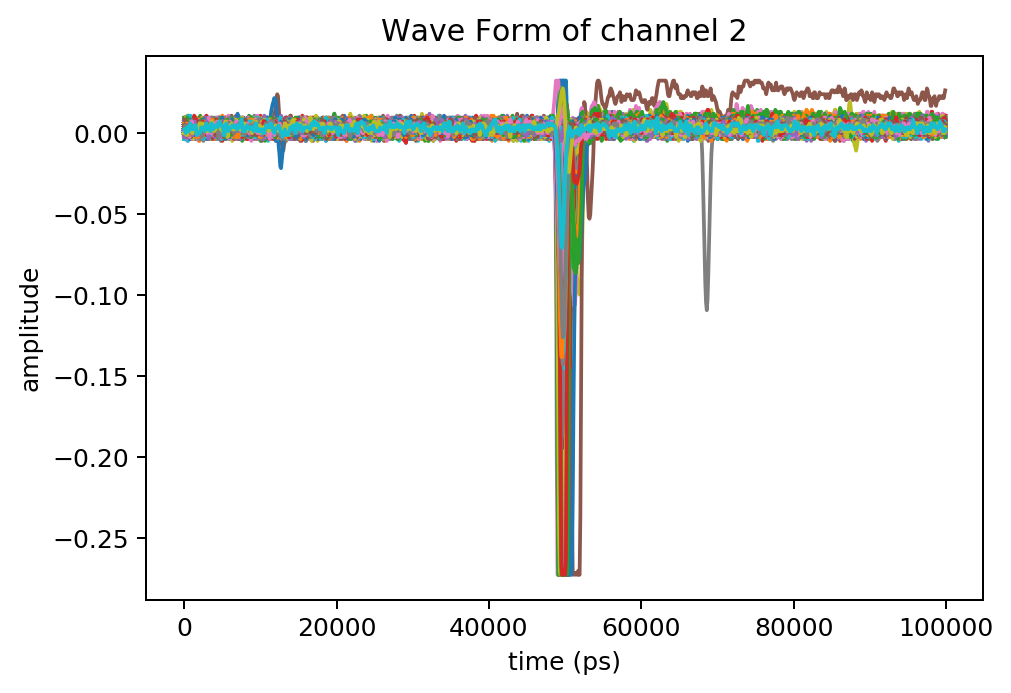

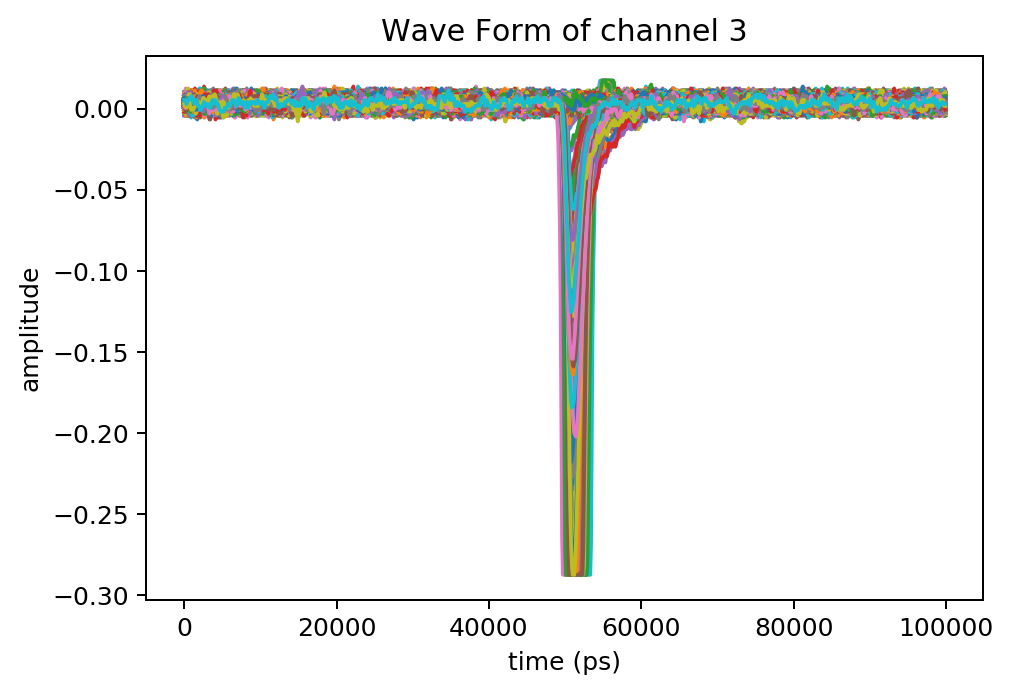

In [1]:
import process as mtd
import mtdProcess as mp
import numpy as np
import h5py
#from jupyterthemes import jtplot
#jtplot.style()
folder='data/Feb3'
flist = mp.makeList_v0('feb+\w', folder)

process = mtd.process('Feb3_UCSC')
#process.source([folder+file,folder+file2])
process.source(flist)
trig = mp.trigger()
trig.trig =0.03
#process.scope.trigger = trig.trigger_all3

#dqm_charge = mp.charge_dist_dqm(title = 'charge distribution')
process.waveform_check(1)
process.waveform_check(2)
process.waveform_check(3)

100%|██████████| 2000/2000 [00:01<00:00, 1837.43it/s]


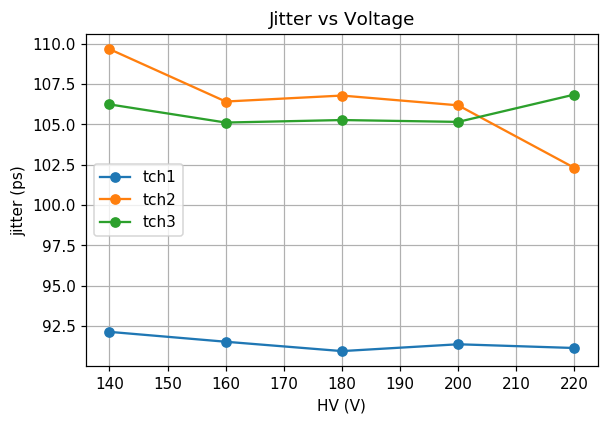

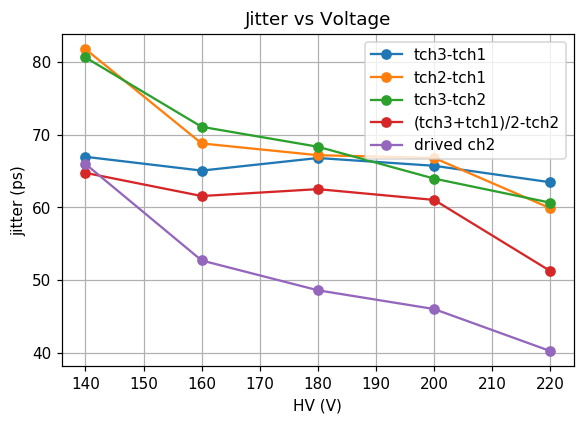

In [2]:

process.path(mp.an_jitter_v0+mp.an_charge_v0)
process.dqmPath(mp.dqm_jitter_eachCh+mp.dqm_jitter)
process.run()

In [3]:
import h5py
f= h5py.File('test_output.h5','r')
data = f['feb3good_UCSC_HV140-Ch2_HP_DG_DiscriOff_HV300-'\
         'CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0']
print(np.argmax(np.array(data['dt21'])),np.amax(np.array(data['dt21'])))
print(data['sig21'])

3 -528.5714285714275
<HDF5 dataset "sig21": shape (), type "<f8">


1
6
14
16
17
26
[50932.142857142855, 50000.0, 51058.333333333336]


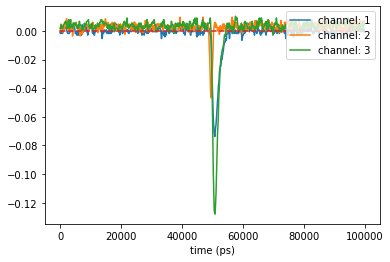

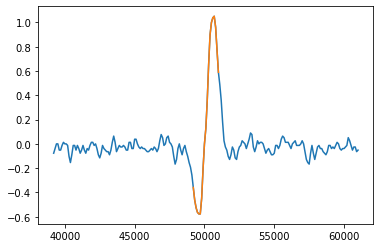

-932.1428571428551


In [4]:
target = 6
counts=0
jitter.dt21.clear()
for i in range(process.scope.nevent):
    p,b=process.scope.triggeredEvent(i)
    if b: 
        print(i)
        counts = counts+1
        if counts == target : 
            jitter.jitter_beamSetup_v0(p)
            t = jitter.get_cftiming(p,[1,2,3])
            print(t)
            process.scope.showEvent(i, [1,2,3])
            jitter.timer.debug(p[0],p[2])
            break

print(t[1]-t[0])

In [15]:
import os
import re
regex = 'feb+\w'
folder = 'data/Feb3'
if folder[-1] != '/': folder = folder+'/'
files = [f+'/'+f+'_0.hdf5' for f in os.listdir(folder)if re.match(regex,f)]
print(files)

['feb3good_UCSC_HV220-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/feb3good_UCSC_HV220-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5', 'feb3good_UCSC_HV140-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/feb3good_UCSC_HV140-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5', 'feb3good_UCSC_HV180-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/feb3good_UCSC_HV180-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5', 'feb3good_UCSC_HV200-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/feb3good_UCSC_HV200-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5', 'feb3good_UCSC_HV160-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv/feb3good_UCSC_HV160-Ch2_HP_DG_DiscriOff_HV300-CH1and3_TrigCh1_minus35mV_VertScale_30mVdiv_0.hdf5']


In [4]:
print(flist)

[]


In [9]:
a = np.array([5.2,3,2])
indx = np.argsort(a)
a=a[indx]
print(indx, a)

[2 1 0] [2.  3.  5.2]
